In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.constants import k

# Problem 2: Average potential energy and heat capacity

### Task 1: Average energy and heat capacity (4 marks)

#### a) The maple code is essentially structured in four parts: 1. Initialisation, 2. Monte Carlo loop, 3.Data calculation, and 4. analysis. Indicate these four parts in the example code above. (0.5 mark)

In [2]:
# FUNCTIONS
def V(x, kf = 10.0):
    '''Potential energy # Pseud code for the metropolis algorithm - the harmonic oscillator kg m2 s–2
    input:
        x : displacement (m), float
        kf = force constant, N/m (float)
    output:
        V(x): potential energy (J), float
    '''
    nm = 10**(-9) # nanometres
    return (kf * (x**2)*(nm**2) / 2)

def metropolis_monte_carlo_task1(N = 20000, deltax = 0.15, T = 300.0, kf = 10.0, plot = 'yes'):
    """
    Uses the metropolis monte carlo method to simulate a harmonic oscillator - includes calculations for Xav and X2av
    inputs:
        N = number of data points to generate, (int)
        deltax = maximum displacement, nm (float)
        T = temperature, K (float)
        kf = force constant, N/m (float)
        plot = yes to return x1_list and E1_list to be able to plot for their histograms, str
    outputs:
        Eav = average potential energy, J (float)
        E2av = average squared potential energy, J^2 (float)
        CV = heat capacity, J/K (float)
        x1_list = list of x1 (displacement, nm) values, (list)
        E1_list = list of E1 (potential energy, J) values, (list)
    """
    x1_list = []
    E1_list = []
    
    # ----------- 1. Initialise parameters ----------- 

    nm = 10**(-9) # nanometres
    k = 1.381*10**(-23) # Boltzmann const J m-2 K-1
    kT = k*T # initial thermal energy

    # calculate E1 using any reasonable inital vales
    Etot = 0.0 # initial energy <E>
    E2tot = 0.0 # initial <E2>
    x1 = 0.0 # first guess of x in nm
    E1 = V(x1) # first guess of energy

    # ----------- 2. Monte carlo loop ----------- 
    for i in range(1, N):
    #     calculate E2 using other parameter values chosen at random
        x2 = x1 + np.random.uniform(-1,1) * deltax
        E2 = V(x2) # new PE
        DeltaE = E2 - E1 # energy difference
    # ----------- 3. Data calculation -----------
        if DeltaE <= 0.0: # if deltaE is negative
            x1 = x2 # save new configuration
            E1 = E2 # save new energy

        else:
            if np.exp(-DeltaE/kT) > np.random.rand():
                x1 = x2 # save new configuration
                E1 = E2 # save new energy
            if np.exp(-DeltaE/kT) <= np.random.rand():
                x1 = x1
    #     continue the loop until Xtot is obtained to a specific accuracy or a predetermined number of trials are complete
    #  for this case until N iterations are complete
        Etot = Etot + E1 # always add to total <E>

        E2tot = E2tot + E1**2 # add to total <E2>
        x1_list.append(x1)
        E1_list.append(E1)

    # ----------- 4. Analysis ----------- 
    Eav = (Etot) / N # <E>
    E2av = (E2tot / N) # <E2>
    CV = (E2av-Eav**2)/(k*T**2)   
    
    if plot == 'yes':
        return Eav, E2av, CV, x1_list, E1_list
    else:
        return Eav, E2av, CV

Below are graphs to display the metropolis monte carlo method from the function metropolis_monte_carlo_task1.
The displacement histogram shows a uniform distribution of points due to the use of the random.uniform function to generate the new state.
The energy histogram shows a boltzmann distribution of data points.


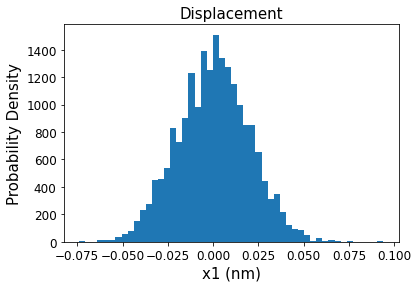

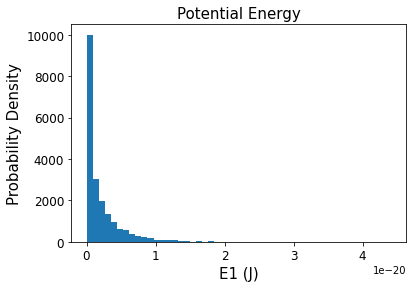

In [34]:
Eav, E2av, CV, x1_list, E1_list = metropolis_monte_carlo_task1()

#     plotting to show the distributions of displacement and energy
plt.figure()
plt.hist(x1_list, bins = 50);
plt.xlabel('x1 (nm)', size = 15)
plt.ylabel('Probability Density', size = 15)
plt.title('Displacement', size = 15)
plt.xticks(size = 12)
plt.yticks(size= 12)
plt.figure()
plt.hist(E1_list, bins = 50)
plt.xlabel('E1 (J)', size = 15)
plt.ylabel('Probability Density', size = 15)
plt.title("Potential Energy", size = 15)
plt.xticks(size = 12)
plt.yticks(size= 12);
print("Below are graphs to display the metropolis monte carlo method from the function metropolis_monte_carlo_task1.")
print("The displacement histogram shows a uniform distribution of points due to the use of the random.uniform function to generate the new state.")
print("The energy histogram shows a boltzmann distribution of data points.")

#### b) State what are the mistakes in the Monte Carlo code above? (0.5 mark)

##### Mistakes:
1. Where Etot was calculated (in the for loop), Etot = E1 whereas it should be Etot = Etot + E1.
2. Where Eav was calculated at the end, it was Eav = (Etot), however this should be Eav = (Etot) / N.
3. When initialising the parameters, kf was defined twice for the Boltzmann constant and force constant, the Boltzmann constant has now been changed to k.
4. I have used x2 = x1 + np.random.uniform(-1,1) * deltax instead of x2 = x1 + np.random.rand() * deltax to generate the next displacement data point on the random walk so that the distribution of data points is symmetric about x1, scaled by deltax. This line of code uses the function np.random.uniform(-1,1) to generate positive and negative random values according to a uniform distribution.

#### c) Use the Monte Carlo code to calculate the average energy, the average square energy, and the heat capacity of the harmonic oscillator. (2 mark)

In [36]:
# calculate the averages over many results to improve the accuracy
Eav_list = []
E2av_list = []
CV_list = []
for i in range(10):
    Eav, E2av, CV = metropolis_monte_carlo_task1(plot = 'no')
    Eav_list.append(Eav)
    E2av_list.append(E2av)
    CV_list.append(CV)
Eav_mean = np.mean(Eav_list)
E2av_mean = np.mean(E2av_list)    
CV_mean = np.mean(CV_list)

print('Calculated from the Monte Carlo code:')
print('average energy:', Eav_mean, 'J')
print('average square energy:', E2av_mean, 'J^2')
print('heat capacity of the harmonic oscillator:', CV_mean, 'J/K at 300 K')

Calculated from the Monte Carlo code:
average energy: 2.078607651290754e-21 J
average square energy: 1.3150232861884618e-41 J^2
heat capacity of the harmonic oscillator: 7.10178398981868e-24 J/K at 300 K


#### d) Verify that the theoretical value of the average potential energy is [E] = 2.07×10–21 J. To do this you need to use Eq. (5) and perform both integrals using the numerical integration routine in Python (1 mark)

#### Equation 5 - to be integrated:
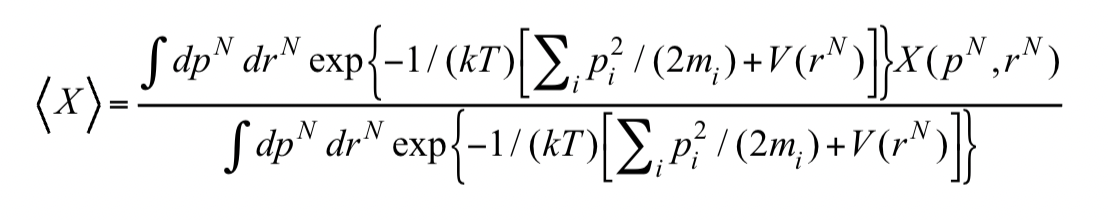

In [5]:
def top_integral(x, T = 300.0):
    """
    Calculates the integration of the numerator in equation 5 in the handout
    inputs:
        x = displacement of the harmonic oscillator, nm (float)
        T = temperature, K (float)
    outputs:
        (np.exp(-(1/(k*T)) * V(x))) * V(x), (float)
    """
    
    return (np.exp(-(1/(k*T)) * V(x))) * V(x)

def bottom_integral(x, T = 300.0):
    """
    Calculates the integration of the denominator in equation 5 in the handout
    inputs:
        x = displacement of the harmonic oscillator, nm (float)
        T = temperature, K (float)
    outputs:
        np.exp(-(1/(k*T)) * V(x)), (float)
    """
    return np.exp(-(1/(k*T)) * V(x))

top = integrate.quad(top_integral, 0, 0.15)
bottom = integrate.quad(bottom_integral, 0, 0.15)
Eav_numerical = top[0] / bottom[0]

print('The numerical integration of equation 5 in the handout (shown above), gives the value for the average potential energy to be:', Eav_numerical, "J")
print("This is very similar to the theoretical value: 2.07×10–21 J, with a percentage difference of:", (np.abs(Eav - 2.07e-21)/2.07e-21)*100, "%, verifying this quantity.")

The numerical integration of equation 5 in the handout (shown above), gives the value for the average potential energy to be: 2.070973499979067e-21 J
This is very similar to the theoretical value: 2.07×10–21 J, with a percentage difference of: 1.5361695157749127 %, verifying this quantity.


### Task 2: Average displacement 
#### The average displacement can be calculated by adding lines (1 marks)<br> 
#### Xtot = Xtot + x1 # add to total X <br> 
#### X2tot = X2tot + x1^2 # add to total X2 <br> 
#### in the loop after E2tot:=... and remembering to define and set the new variables to zero at the start of the calculation.

In [6]:
# FUNCTIONS
def metropolis_monte_carlo_task2(N = 20000, deltax = 0.15, T = 300.0, kf = 10.0):
    """
    Uses the metropolis monte carlo method to simulate a harmonic oscillator - includes calculations for Xav and X2av
    inputs:
        N = number of data points to generate, (int)
        deltax = maximum displacement, nm (float)
        T = temperature, K (float)
        kf = force constant, N/m (float)
    outputs:
        Eav = average potential energy, J (float)
        E2av = average squared potential energy, J^2 (float)
        CV = heat capacity, J/K (float)
        Xav = average displacment, nm (float)
        X2av = average squared displacment, nm^2 (float)
    """
        # ----------- 1. Initialise parameters ----------- 
    nm = 10**(-9) # nanometres
    k = 1.381*10**(-23) # Boltzmann const J m-2 K-1
    kT = k*T # initial thermal energy

    # calculate E1 using any reasonable inital vales
    Etot = 0.0 # initial energy <E>
    E2tot = 0.0 # initial <E2>
    x1 = 0.0 # first guess of x in nm
    E1 = V(x1) # first guess of energy

    # ----- NEW VARIABLE DEFINED -----
    Xtot = 0 
    X2tot = 0
    # ----------- 2. Monte carlo loop ----------- 
    for i in range(1, N):
    #     calculate E2 using other parameter values chosen at random
        x2 = x1 + np.random.uniform(-1,1) * deltax
        E2 = V(x2) # new PE
        DeltaE = E2 - E1 # energy difference
    # ----------- 3. Data calculation -----------
        if DeltaE <= 0.0: # if deltaE is negative
            x1 = x2 # save new configuration
            E1 = E2 # save new energy

        else:
            if np.exp(-DeltaE/kT) > np.random.rand():
                x1 = x2 # save new configuration
                E1 = E2 # save new energy
            if np.exp(-DeltaE/kT) <= np.random.rand():
                x1 = x1
    #     continue the loop until Xtot is obtained to a specific accuracy or a predetermined number of trials are complete
    #  for this case until N iterations are complete
        Etot = Etot + E1 # always add to total <E>

        E2tot = E2tot + E1**2 # add to total <E2>
        #     ------ ADDITIONAL CODE FOR AVERAGE DISPLACEMENT -------
        Xtot = Xtot + x1 # add to total X <br> 

        X2tot = X2tot + x1**2 # add to total X2

    # ----------- 4. Analysis ----------- 
    Eav = (Etot) / N # <E>
    E2av = (E2tot / N) # <E2>
    CV = (E2av-Eav**2)/(k*T**2)   
    #  -------- ADDITIONAL ANALYSIS VARIABLES --------
    Xav = Xtot / N # <X> 
    X2av = X2tot / N # <X2>

    return Eav, E2av, CV, Xav, X2av

In [40]:
list_of_Xav = []
list_of_X2av = []
for i in range(10):
    Eav, E2av, CV, Xav, X2av = metropolis_monte_carlo_task2()

    list_of_Xav.append(Xav)
    list_of_X2av.append(X2av)
    
Xav = np.mean(list_of_Xav)
X2av = np.mean(list_of_X2av)

#### a) What is the typical value for [X] = Xtot / N ? Why is this result expected? (0.5 mark)

In [41]:
print("The average displacement, <X>, calculated in the monte carlo method above is:", Xav, "nm")
print("This value is very close to zero, which is expected as the harmonic oscillator will oscillate around zero displacement, making this the expected average. ")

The average displacement, <X>, calculated in the monte carlo method above is: -0.00014427750643125414 nm
This value is very close to zero, which is expected as the harmonic oscillator will oscillate around zero displacement, making this the expected average. 


#### b) What is the typical value for [X^2] = X2tot / N? How does the result compare to the theoretical value of kT / kf = 0.00041 nm^2? (0.5 mark)

In [42]:
print("The average squared displacement, <X^2>, calculated in the monte carlo method above is:", X2av, "nm^2")
print("This value is very similar to the theoretical value of 0.00041 nm^2. It has a percentage difference from the theoretical value of:", (np.abs(X2av - 0.00041)/0.00041)*100, "%, showing the monte carlo method is very accurate.")

The average squared displacement, <X^2>, calculated in the monte carlo method above is: 0.0004165538058048672 nm^2
This value is very similar to the theoretical value of 0.00041 nm^2. It has a percentage difference from the theoretical value of: 1.5984892206993135 %, showing the monte carlo method is very accurate.


### Task 3: Understanding (1 marks) 
#### Explain why Metropolis Monte Carlo method works, in particular why and how only important contributions to the statistical average are obtained in the simulations?

The Metropolis Monte Carlo method works as generates a random change to the original state of the system that is then rejected or accepted based on the system it is simulating, in this case, the harmonic oscillator. 

Only important contributions to the statistical average are obtained in the simulation as it randomly generates a new state based off of the previous state. This is then accepted or rejected through passing through the criteria set by the system so that only important contributions are obtained. 

### Task 4: Error calculations (1 mark) 
#### Calculate the fractional error for the average energy per oscillator using eq. (10) for several values of the number of measurements N (i.e.10,100,1000,..). Generate a corresponding plot.

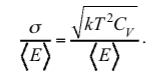

The fractional error for the average energy per oscillator becomes relatively constant at approximately 2000 measurements.


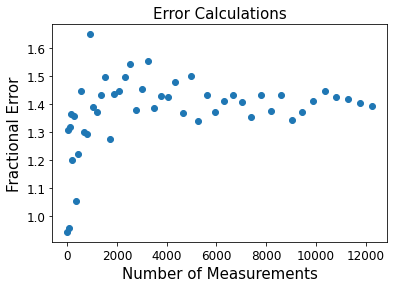

In [46]:
def fractional_error(CV, Eav, T = 300.0):
    """Calculates the fractional error for the average energy per oscillator using eqn 10 in the handout
    inputs:
        T = temperature, K (float)
        Eav = average potential energy, J (float)
        CV = heat capacity, J/K (float)
    outputs:
        fractional error for the average energy per oscillator, (float)
    """
    numerator = np.sqrt(k * (T**2) * CV)
    return numerator / Eav

N_list = []
total = 0
for i in range(1, 50):
    total = total + i*10
    N_list.append(total)
# print(N_list)
fractional_error_list = []
for N_value in N_list:
    Eav, E2av, CV, Xav, X2av = metropolis_monte_carlo_task2(N = N_value)
    f_e = fractional_error(CV, Eav)
    fractional_error_list.append(f_e)
plt.figure()
plt.scatter(N_list, fractional_error_list)
plt.xlabel("Number of Measurements", size = 15)
plt.ylabel("Fractional Error", size = 15)
plt.title("Error Calculations", size = 15)
plt.xticks(size = 12)
plt.yticks(size= 12);

### Task 5: Quality of presentation of report in Jupyter notebook (2 marks)

There is a high quality of presentation, I have used graphs and formatting to support displaying the data alongside print statements and markdown cells to make it easy to read.

I have also written detailed docstrings to help understanding of the functions I created, for repeatability of my work.

### Task 6: Bonus point (1 mark). Justify why your work/report goes beyond just completing the tasks.

I have improved upon my answers to the tasks by averaging the values over many monte carlo simulations to increase the accuracy of the result. Also, I have produced histogram plots of the displacement and potential energy to demonstrate understanding of the monte carlo method. 

### Self assessment

#### 1a. I have identified each of the four parts of the maple code and shown this in the function I have created for it. Therefore, I have met the criteria for the 0.5 marks.
#### 1b. I have identified the four mistakes in the maple code given in the handout and have written these down (they have been fixed in the code I have written). Therefore, I have met the criteria for the 0.5 marks.
#### 1c. I have calculated values for Eav, E2av and CV which I have then compared to the average values given in the handout to check that they are correct, which they are. Therefore, I have met the criteria for the 2 marks.
#### 1d. I have used equation 5 in the handout to calculate the average potential energy and compared this to the theoretical value. Therefore, I have met the criteria for the 1 mark.
#### 2a. I have used the maple code to calculate a typical value for Xav and commented on why this is expected. Therefore, I have met the criteria for the 0.5 marks.
#### 2b. I have calculated a typical value for X2av and compared this to the theoretical value. Therefore, I have met the criteria for the 0.5 marks.
#### 3. I have written a paragraph on why the monte carlo method works, therefore, I have met the criteria for the 1 mark.
#### 4. I have generated a plot to compare the fractional error to the number of measurements. Therefore, I have met the criteria for the 1 mark.
#### 5. I have maintained the quality of this notebook to a high standard using properties such as markdown cells and print statements to make it easy to read. Therefore, I have met the criteria for the 2 marks. 

### Total marks: 10/10

### Declaration of Academic Integrity 
The work in this notebook is my own and I have marked it fairly.